In [9]:
import warnings
warnings.filterwarnings("ignore")

from __future__ import print_function
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
"""
This notebook illustrates time series decomposition by moving averages.
Both additive and multiplicative models are demonstrated.
"""

'\nThis notebook illustrates time series decomposition by moving averages.\nBoth additive and multiplicative models are demonstrated.\n'

In [5]:
"""
Let us demonstrate the addtive model using US Airlines monthly miles flown dataset.
"""

'\nLet us demonstrate the addtive model using US Airlines monthly miles flown dataset.\n'

In [2]:
#read the data from into a pandas.DataFrame
air_miles = pd.read_csv('Data/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles['Month']

In [3]:
#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', air_miles.shape)

Shape of the DataFrame: (97, 2)


In [4]:
#Let's see first 5 rows of it
air_miles.head()

,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0


In [5]:
#Let's rename the 2nd column
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'
                         },
                inplace=True
                )

In [6]:
#Check for missing values and remove the row
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


In [7]:
#Let us estimate the trend component by 2X12 monthly moving average
MA12 = air_miles['Air miles flown'].rolling(window=12).mean()
trendComp = MA12.rolling(window=2).mean()

In [10]:
#Let us now compute the residuals after removing the trend component
residuals = air_miles['Air miles flown'] - trendComp

#To find the sesonal compute we have to take monthwise average of these residuals
month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
#Number of years for which we have the data
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.as_matrix()]*nb_years).reshape((12*nb_years,))

In [11]:
#After deducting the trend and seasonal component we are left with irregular variations
irr_var = air_miles['Air miles flown'] - trendComp - seasonalComp

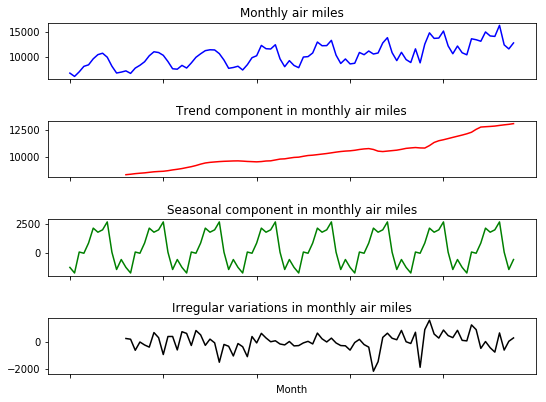

In [12]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(7.5, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

#plt.savefig('plots/ch2/B07887_02_20.png', format='png', dpi=300)

In [13]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')

In [14]:
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.06577411025730114


In [31]:
"""
The additive decompostion has been able to reduce the p-value
from 0.99 in case of the original time series
(as shown in Chapter_2_Augmented_Dickey_Fuller_Test.ipynb)
to 0.066 after decomposing.
"""

'\nThe additive decompostion has been able to reduce the p-value\nfrom 0.99 in case of the original time series\n(as shown in Chapter_2_Augmented_Dickey_Fuller_Test.ipynb)\nto 0.066 after decomposing.\n'

In [32]:
"""
Now we will attempt decomposition of the original time
using a multiplicative model
"""

'\nNow we will attempt decomposition of the original time\nusing a multiplicative model\n'

In [33]:
"""
Computation of the trend-cycle component remain same. But the seasonal component
is estimated as follows
"""

'\nComputation of the trend-cycle component remain same. But the seasonal component\nis estimated as follows\n'

In [15]:
#We start with the residuals left after removing the trend component
residuals = air_miles['Air miles flown'] / trendComp

#To find the sesonal compute we have to take monthwise average of these residuals
month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
#Number of years for which we have the data
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.as_matrix()]*nb_years).reshape((12*nb_years,))

In [16]:
#After adjusting the trend and seasonal component we are left with irregular variations
irr_var = air_miles['Air miles flown'] / (trendComp * seasonalComp)

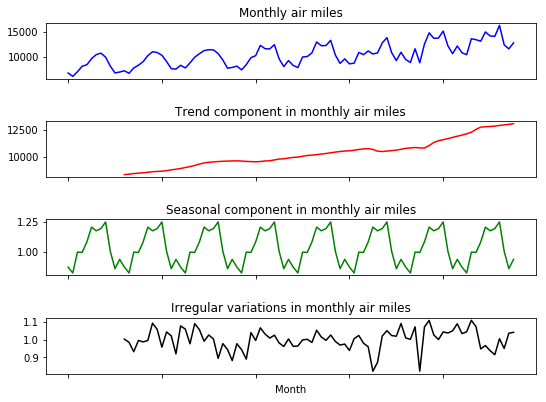

In [18]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(7.5, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

#plt.savefig('plots/ch2/B07887_02_21.png', format='png', dpi=300)

In [19]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')

In [20]:
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.00017645280908370881


In [40]:
"""
Voila! The p-val has further reduced to 0.000176.
The null hypothesis about non-stationarity of the irregular variations
can be rejected at even a level of confidence of 99 % (alpha=0.01).
This shows that the original time series has been de-stationarized to
the stationary irregular variations. Besides we have estimates of both trend-cycle
and seasonal components.
"""

'\nVoila! The p-val has further reduced to 0.000176.\nThe null hypothesis about non-stationarity of the irregular variations\ncan be rejected at even a level of confidence of 99 % (alpha=0.01).\nThis shows that the original time series has been de-stationarized to\nthe stationary irregular variations. Besides we have estimates of both trend-cycle\nand seasonal components.\n'